## Answer of question no. 1


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
#here, H0 : u1 = u2   ....both cutlets having same diameter
#      H1 : u1 != u2
# here two samples are given so, we are conducting two sample t-tail test
# the mean of two independent samples is compared

In [ ]:
cutlets = pd.read_csv("/content/Cutlets.csv")

In [ ]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
cutlets.info()  # to get information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
cutlets.describe()  # to check descriptive statistics.

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
cutlets.dtypes    #to check the data type of column.

Unit A    float64
Unit B    float64
dtype: object

In [ ]:
cutlets.shape

(35, 2)

In [ ]:
statistics , p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'])
#gives you 2 sample 2 tail test , so no need to divide p by 2.

In [ ]:
print('P_value:', p_value)

P_value: 0.4722394724599501


In [ ]:
#P_value: 0.4722394724599501,  alph : 5% of significance i.e 0.05
# p > alpha. so,  we fail to reject null hypothesis
#As there is no significance difference in the means of two samples we fail
#to reject nuull hypothesis

## Answer of question no. 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# We are going to conduct Anova test .
#As we are compare the mean of 4 independent samples 
# H0 : u1=u2=u3=u4
# H1 : atleast on of them is different

In [ ]:
Lab = pd.read_csv("/content/LabTAT.csv")

In [ ]:
Lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [ ]:
Lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
Lab.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
Lab.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [ ]:
Lab.shape

(120, 4)

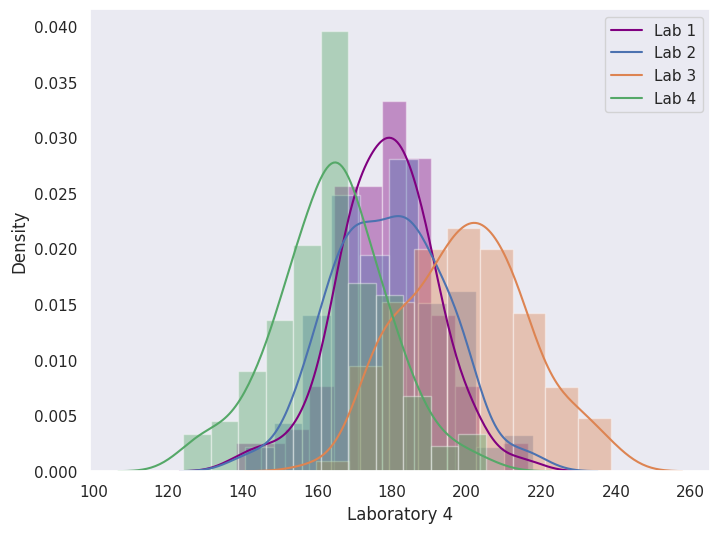

In [ ]:
#To check the distribution of data.
plt.figure(figsize = (8,6))
labels = ['Lab 1','Lab 2','Lab 3','Lab 4']
sns.set(style = 'dark',)
sns.distplot(Lab['Laboratory 1'],color = 'purple', kde = True)
sns.distplot(Lab['Laboratory 2'], hist = True)
sns.distplot(Lab['Laboratory 3'], hist = True)
sns.distplot(Lab['Laboratory 4'], hist = True)
plt.legend(labels)
plt.show()

In [ ]:
statistics, p_value = stats.f_oneway(Lab.iloc[:,0],Lab.iloc[:,1],Lab.iloc[:,2],Lab.iloc[:,3])

In [ ]:
print("P_value:",p_value)

P_value: 2.1156708949992414e-57


In [ ]:
#p = 2.1156708949992414e-57 < alph = 0.05 
# Therefore reject null hypothesis
# Hence thre is a significance differenec difference betweeen TAT of reports of the laboratories

## Answer of question no. 3

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#To check the relationship between two catogetegorical variables we have to use chi-square test
#Here, H0 : There is no dependency between the gender based on buyer rations across regions
#      H1 : There is dependency between the gender based on buyer rations across regions


In [ ]:
Buyer = pd.read_csv("/content/BuyerRatio.csv")

In [ ]:
Buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


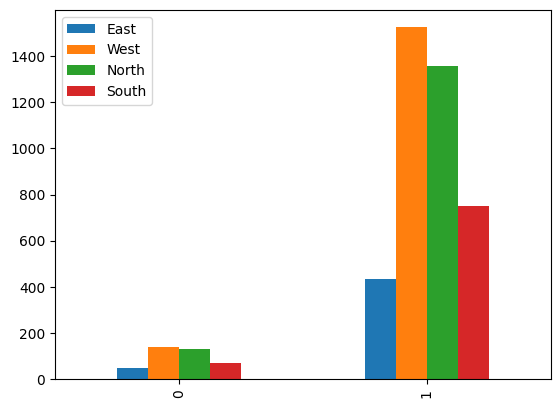

In [ ]:
Buyer.plot(kind="bar",
          stacked = False )
plt.show()

In [ ]:
data =  [[50,142,131,70],
        [435,1523,1356,750]]

In [ ]:
statistic, pvalue, dof, expected_freq = stats.chi2_contingency(data) 

In [ ]:
print(statistic)
print(pvalue)
print(dof)
print(expected_freq)

1.595945538661058
0.6603094907091882
3
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [ ]:
observed = np.array([50,142,131,70,435,1523,1356,750])
expected = np.array([42.76531299,146.81287862,131.11756787,72.30424052,442.23468701,1518.18712138,1355.88243213,747.69575948])

In [ ]:
statistics, pvalue =stats.chisquare(observed, expected, ddof = 3)

In [ ]:
print("statistics:" ,statistics,"\n","pvalue:",pvalue)

statistics: 1.5959455390914483 
 pvalue: 0.8095206646905712


In [ ]:
#pvalue = 0.8095206646905712 > aplha = 0.05
# Hence we fail to reject null hypothesis 
# Therefore there is no dependency between the gender. 

## Answer of question no. 4

In [ ]:
#Here we are conducting chi2-square test with contingency table
# H0 : u1=u2=u3=u4
# H1 : At least one of them is different

In [ ]:
customer = pd.read_csv("/content/Costomer+OrderForm.csv")

In [ ]:
customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [ ]:
customer.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [ ]:
customer.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [ ]:
customer.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [ ]:
customer.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [ ]:
customer.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [ ]:
#create contingency table
contingency_table = [[271,267,269,280],
                     [29,33,31,20]]

In [ ]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)

In [ ]:
print(stat)
print(p)
print(df)
print(exp)

3.858960685820355
0.2771020991233135
3
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [ ]:
observed = [271,267,269,280,29,33,31,20]
expected = [271.75 ,271.75 ,271.75 ,271.75,28.25,  28.25 , 28.25 , 28.25]

In [ ]:
statistics , p_value = stats.chisquare(observed,expected,ddof=3)
print("t_statistics:",statistics,"\n","p_value:",p_value)

t_statistics: 3.858960685820355 
 p_value: 0.4254298144535761


In [ ]:
# p_value: 0.4254298144535761 > aplha : 0.05
# Hence we fail to reject null hypothesis
# Therefore atleast one of them is different
